# Introduction

Welcome to the first of a multi-part article series that covers the datasets available in the scikit-learn library. Throughout this series, you will learn about these datasets by being guided through the process of performing exploratory data analysis and building a machine learning model. By the end of this series, you will have gained valuable knowledge and experience in working with these datasets and applying machine learning techniques to real-world problems.

This article attempts to offer a thorough tutorial for creating a machine-learning model that uses logistic regression to categorize flowers from the famous iris dataset. I will show a basic implementation using the scikit-learn library, which has pre-made tools and functions for machine learning applications. You will learn how to use logistic regression to perform a classification task. You will also will learn useful techniques for data exploration and analysis. As prerequisites you should be farmiliar with the python programming language, and jupyter notebooks. Before we get to the data analysis here is a bit more context on what this article aims to cover. 

### The Iris Dataset

The iris dataset is one of the most famous datasets in the field of machine learning. It consists of 150 observations of iris flowers from three different species: Setosa, Versicolor, and Virginica. Each observation has four features: the length and width of the sepals and petals, measured in centimeters. This dataset is often used as a benchmark for machine learning classification algorithms, as it is small, well-understood, and easily accessible.

### Logistic Regression

Logistic regression is a statistical method used for predicting the probability that something is true or false, in other words a binary outcome. More specifically, logistic regression is a **classification algorithm** used to determine the likelihood of an event occurring based on a set of features. In the case of this article, logistic regression is used to predict the species of an iris flower based on the length and width of its petals and sepals, using these measurements as features.

### Classification

Classification is a type of **supervised machine learning** technique that involves categorizing input data into different *classes* based on certain predefined criteria. In other words, it is a method of identifying to which group or category a new piece of data belongs, based on the patterns and characteristics of the existing data.

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import copy
import math

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
print(iris_df[:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
print(iris_df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In the Iris dataset, the target values are represented as integers from 0 to 2, where 0 represents Setosa, 1 represents Versicolor, and 2 represents Virginica. These integers are assigned based on the alphabetical order of the target names. Since Setosa comes first in alphabetical order, it is assigned 0. Similarly, Versicolor is assigned 1 and Virginica is assigned 2.

In [ ]:
iris_df['target'] = iris.target

In [ ]:
iris_df['target_names'] = iris_df['target'].map(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
iris_df[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
iris_df[50:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
iris_df[145:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [ ]:
print(iris_df.groupby('target').size())

target
0    50
1    50
2    50
dtype: int64


To simplify the classification problem, we will remove the **Iris-virginica** specises from the data frame. This way we have only two targets, keeping this problem a binary classification problem.

In [ ]:
iris_df = iris_df[iris_df['target'] != 2]

In [ ]:
iris_df.groupby('target').size()

target
0    50
1    50
dtype: int64

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    int64  
 5   target_names       100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.5+ KB


## Visualizations

Perfect. Now that we have performed some basic data analysis we can now visualize the data. 


Using the seaborn library to make a scatter plot and histogram is easy!

In [ ]:
import seaborn as sns

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

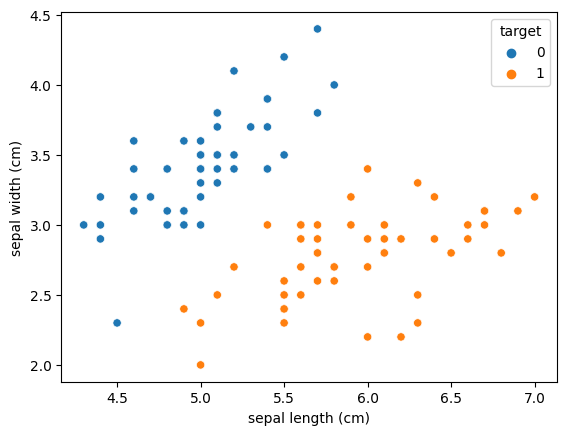

In [ ]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target')

<Axes: xlabel='petal length (cm)', ylabel='Count'>

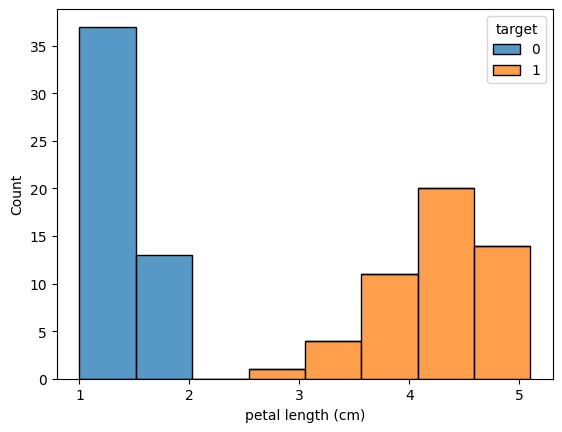

In [121]:
sns.histplot(data=iris_df, x='petal length (cm)', hue='target', multiple='stack')

Plotting sepal length against sepal width, we can see if there is a clear separation between different classes, which would indicate that these two features are good predictors of class.

# Build the Model

The first thing that we need to do is create test and training sets on the data. We first define X as all the features except the target column, and y as the target column. Then we use train_test_split to split X and y into training and testing sets. We specify that we want 20% of the data to be used for testing, and set the random_state parameter to a fixed value to ensure reproducibility. The function returns four arrays: X_train, X_test, y_train, and y_test, which represent the training and testing sets for the features and the target, respectively.

Using a dataframe was useful for helping organize, visualize and understand the data, but using a NumPy array for training machine learning models is commonly used in the machine learning community because they offer several advantages over standard Python lists or pandas data frames. 

NumPy arrays are homogeneous, meaning they contain elements of the same data type, which makes them more memory-efficient and faster to compute. They also provide a convenient interface for performing mathematical operations and matrix operations, which are frequently used in machine learning algorithms.

To convert our dataframes into NumPy arrays we can use the ***values*** attribute of the DataFrame.

Lastly, as mentioned in the visualization section above, we found that there is a good seperation of classes when we compare the sepal length and sepal width and so for simplicity, we will only use those two features, removing the petal length and width from X. 

In [ ]:
from sklearn.model_selection import train_test_split

X = iris_df.drop(['target', 'target_names', 'petal length (cm)', 'petal width (cm)'], axis=1).values
y = iris_df['target'].values

In [ ]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [ ]:
y[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X: {len(X)}, y: {len(y)}')
print(f'X_train: {len(X_train)}, X_test: {len(X_test)}')
print(f'y_train: {len(y_train)}, y_test: {len(y_test)}')

X: 100, y: 100
X_train: 80, X_test: 20
y_train: 80, y_test: 20


For fun lets visualize each set to compare. 

The function **visualize_data()** below creates a scatter plot of the input data by calling the scatter function of the matplotlib library. The scatter plot is created using the first two columns of the input data X as the x-axis and y-axis coordinates respectively. The color of each data point is determined by the corresponding label in y. The colors are chosen from a color map (cmap) provided by matplotlib.

This is to keep the code **DRY**

In [ ]:
def visualize_data(X, y, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=100)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(title)

    # Create a legend
    handles, labels = scatter.legend_elements()
    legend1 = plt.legend(handles, iris.target_names, loc="lower right", title="Classes")
    plt.gca().add_artist(legend1)

    plt.show()

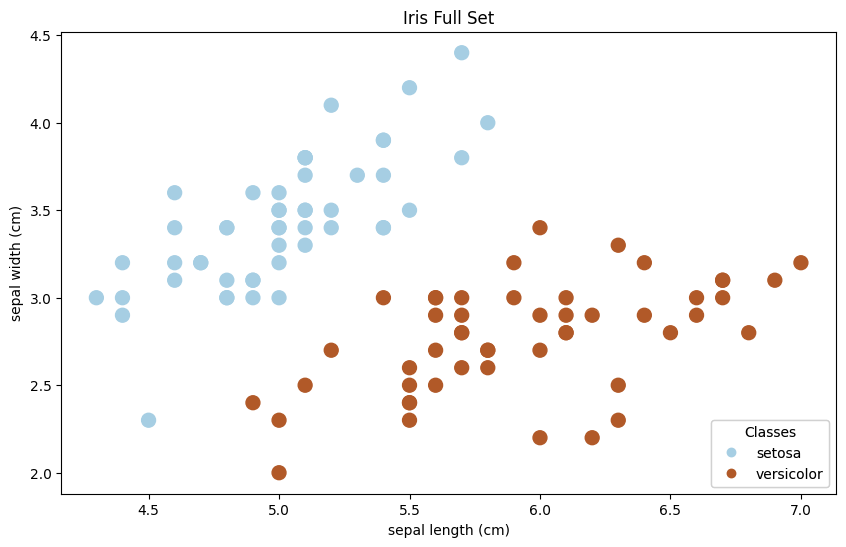

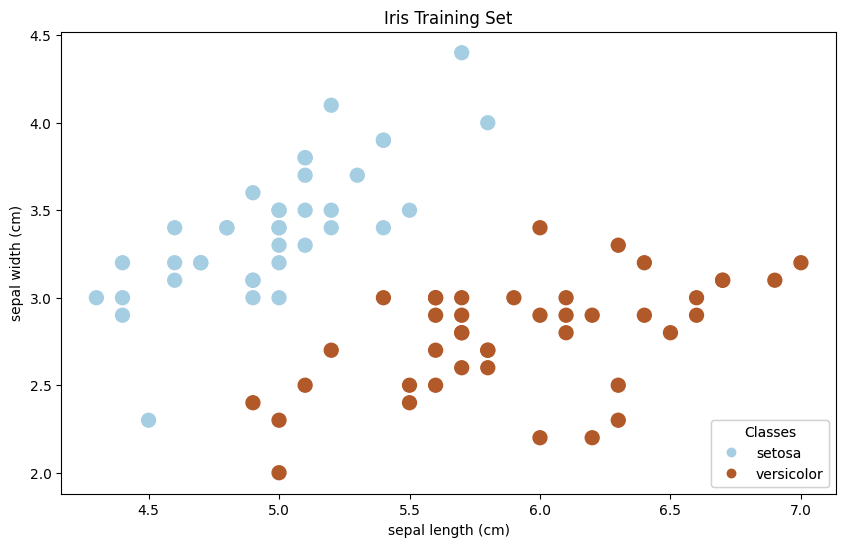

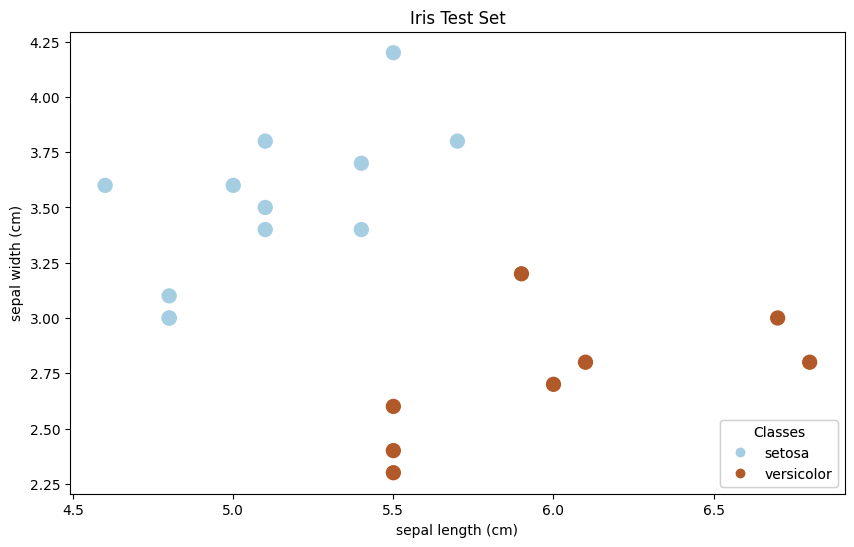

In [ ]:
visualize_data(X, y, 'Iris Full Set')
visualize_data(X_train, y_train, 'Iris Training Set')
visualize_data(X_test, y_test, 'Iris Test Set')

In [ ]:
# Import necessary libraries and modules
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting.decision_regions import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Models predicted species: ", y_pred)
print("Actual species:           ", y_test)

Models predicted species:  [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
Actual species:            [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


### Evaluation Metrics

Evaluation metrics are used to evaluate the performance of a machine learning model in terms of its ability to predict the correct output for a given input. 

***A positive example is the specific target class being predicted by a model. In our example, we are trying to predict whether a flower is an Iris-versicolor or not***

**Accuracy** - Measures how often the models is correct in its predictions

**Precision** - The proportion of positive examples that are correctly predicted by the model out of all positive predictions made.

**Recall** - The proportion of positive examples that are correctly predicted by the model out of all actual positive examples.

**F1-score** - The harmonic mean of precision and recall. It combines both precision and recall into a single metric, and is a useful measure when both precision and recall are important.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred) * 100
prec = precision_score(y_test, y_pred) * 100
rec = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("Accuracy: {:.2f}%".format(acc))
print("Precision: {:.2f}%".format(prec))
print("Recall: {:.2f}%".format(rec))
print("F1-score: {:.2f}%".format(f1))

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


#### Details for Evaluation Metrics

A high precision score means that the model is making fewer false positive predictions, which can be important in applications where false positives are costly. For example, in medical diagnosis, a false positive could lead to unnecessary procedures or treatments.

A high recall score means that the model is correctly identifying a large proportion of positive examples, which can be important in applications where false negatives are costly. For example, in spam filtering, a false negative could result in an important email being missed.

In large scale machine learning projects the trade-off between precision and recall is often referred to as the precision-recall trade-off. Increasing precision typically results in decreasing recall and vice versa. This is because in order to increase precision, the model needs to be more confident in its positive predictions, which can result in more true negatives being classified as negative. Conversely, in order to increase recall, the model needs to be more inclusive in its positive predictions, which can result in more false positives being classified as positive.

The F1-score ranges from 0 to 1, with a score of 1 indicating perfect precision and recall, and a score of 0 indicating that the model makes no correct positive predictions. After running the cell below, you will see we have achieved perfect precision and recall. 


## Learning Curve

The learning curve is a plot that shows how the performance of a machine learning model changes as the size of the training set is increased. It is a useful tool for diagnosing whether a model suffers from high bias (underfitting) or high variance (overfitting), and can help determine whether the model would benefit from more training data.

Although the details of underfitting and overfitting are beyond the scope of this article, they are worth mentioning. The learning curve offers a useful visualization of how the models accuracy improves with increases in training data. 

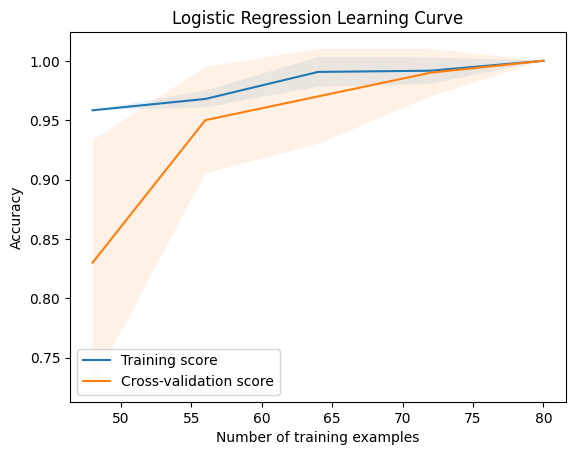

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Set the plot labels and title
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Learning Curve')

# Display the plot
plt.legend()
plt.show()

## Weights and Bias

The weights in logistic regression can be thought of as the importance or relevance of each **input feature** in making the prediction. The larger the weight for a particular feature, the more important that feature is in determining the output. The bias term can be thought of as the baseline value that the model starts with before considering the input features. It shifts the decision boundary left or right, up or down, depending on its value.

During the training process, the values of the weights and bias terms are adjusted through the use of an optimization algorithm like gradient descent, which adjusts the weights and biases in small increments to learn the best values.

By adjusting the values of the weights and bias terms during the training process, the model learns to make better predictions and minimize the error between the predicted and actual outcomes. As these values are learned, they are cocurrently determining the shape and position of the decision boundary.

In the context of our iris classification problem, the logistic regression model is used to predict the probability that a given iris belongs to a particular species (setosa, versicolor) based on its sepal measurements. The weights and biases in this case would be specific values for each of the features (sepal length, sepal width) and the bias term, respectively, that have been learned by the logistic regression algorithm during training.



In [ ]:
# Get the learned weights and bias term from the model
w = model.coef_[0]
b = model.intercept_
print("w: ",w,"b: ",b)

w:  [ 2.88868978 -2.72919824] b:  [-7.07994242]


Our logistic regression model has learned the following values for the weights and bias:

w = [ 2.88868978 -2.72919824]

b = [-7.07994242]

In this case, we can interpret the weights as representing the relative importance of each feature in predicting the probability of a particular iris species. For instance, the feature with the highest weight (in this case, 2.88868978) is the most important feature in distinguishing between the different iris species. The bias term, on the other hand, represents the baseline probability of a particular species regardless of the values of the features.

## Decision Boundary

In binary classification problems, the decision boundary is the line or boundary that separates the two classes, and it's determined by the weights and bias terms in the logistic regression model. Specifically, the weights and bias terms dictate the orientation and position of this decision boundary.

For instance, in our binary classification problem where we aim to distinguish between setosa and versicolor irises, the logistic regression model learns a decision boundary that maximizes the separation between the two species. The values of the weights and bias terms determine the position and orientation of this decision boundary.

Once the weights and biases are learned during the training process, the model can use them to make predictions on new examples. Given an input (for instance, the sepal length and width of a previously unseen iris), the model uses the weights and biases to determine which side of the decision boundary this new example would be classified to.

We can visualize the decision boundary by plotting it on both the training and test sets, using the learned weights from the logistic regression model. Ideally, the decision boundary should split the two species down the center.

The following **plot_data** function is based on the implementation from ___

In [ ]:
def plot_data(X, y, pos_label="Iris-versicolor", neg_label="Iris-setosa"):
    """
    Plots the training data with labels.
    
    Parameters:
    X (array-like): Feature matrix
    y (array-like): Target vector
    pos_label (str, optional): Label for positive examples
    neg_label (str, optional): Label for negative examples
    """
    # Create masks for positive and negative examples
    positive = y == 1
    negative = y == 0
    
    # Plot positive and negative examples
    plt.scatter(X[positive, 0], X[positive, 1], c='b', marker='o', label=pos_label)
    plt.scatter(X[negative, 0], X[negative, 1], c='r', marker='o', label=neg_label)
    
    # Set legend and axis labels
    plt.legend()
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')


def plot_decision_boundary(w, b, X, y):
    """
    Plots the decision boundary for a binary classifier.
    
    Parameters:
    w (array-like): Weight vector
    b (float): Bias term
    X (array-like): Feature matrix
    y (array-like): Target vector
    """
    # Plot training data
    plot_data(X[:, 0:2], y)
    
    # Plot decision boundary for 2D data

    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")
    plt.title('Decision boundary')
    plt.show()

Accuracy: 100.00%
w:  [ 2.88868978 -2.72919824] b:  [-7.07994242]


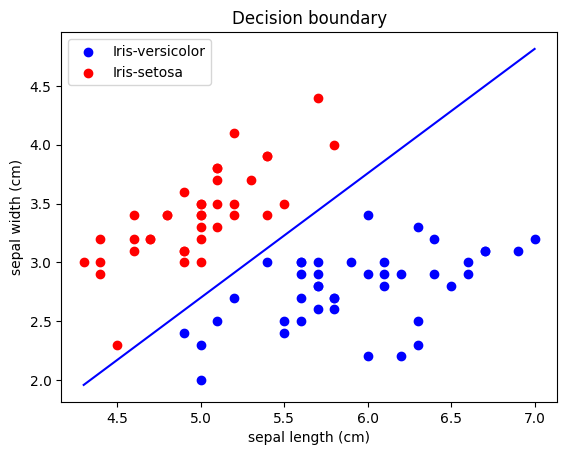

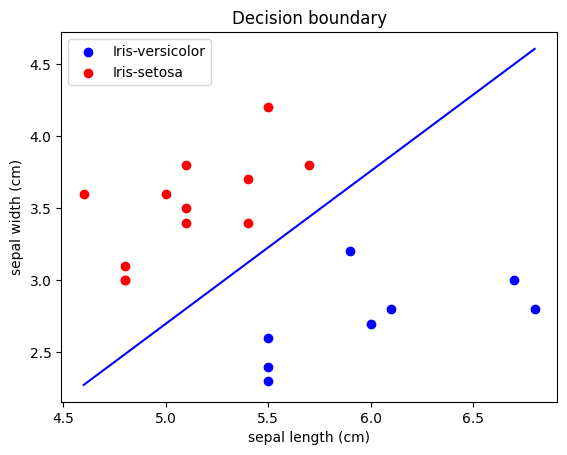

In [ ]:
# Plot decision boundaries for both the train and test sets using the learned weights and bias term
plot_decision_boundary(w, b, X_train, y_train)
plot_decision_boundary(w, b, X_test, y_test)

# Conclusion

In this project, we used the sci-kit learn library to train a logistic regression model to perform a classification task on the iris dataset, which resulted in a model with 100% accuracy. 

Additionally, we performed basic EDA and visualized the dataset using scatter plots and histograms, providing us with a better understanding of its characteristics. We also plotted a learning curve, which showed tha the models accuracy increased as the training size increased. 

We plotted the decision boundary for our logistic regression model, which visually represented how our model separates the classes in our dataset. This is a powerful tool for understanding how the model is making its predictions and for identifying potential issues with the model.

In this article, I intentionally provided a high-level overview without delving into complex topics such as overfitting, underfitting, and optimization algorithms. My aim was to introduce readers to machine learning concepts and gradually familiarize them with the field, avoiding overwhelming them with technical details at the outset.

Overall, this project provided valuable experience in using different data analysis libraries such as matplotlib, numpy, and pandas. It also helped us to develop a deeper understanding of logistic regression, which will be useful in further machine learning projects.